# Implementing SGD and Momentum

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import torch_dataset
from torch.utils.data import DataLoader

## Dataset

In [4]:
ds = torch_dataset.UClasses(n=1000)
#ds.inputs()
#ds.targets()

In [5]:
ds.classes()

tensor([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,

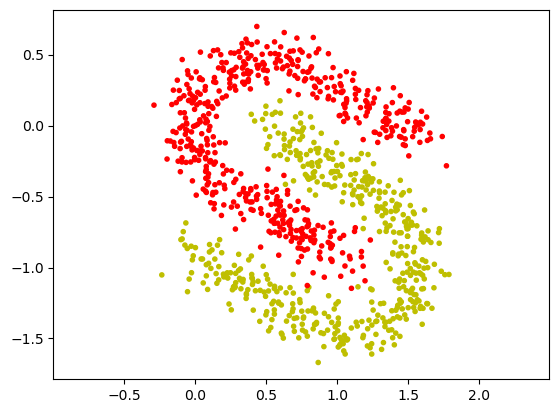

In [6]:
ds.plot()

## Implement `sgd` with momentum

In [7]:
def sgd(net, dl, loss_func, lrate=0.1, epochs=10, momentum=0.):
    print("sgd called")
    '''
     losses = sgd(net, dl, loss_func, lrate=0.1, epochs=10, momentum=0.)
     
     Performs learning using stochastic gradient descent (SGD).
     
     Inputs:
       net        PyTorch nn.Module
       dl         PyTorch DataLoader object
       loss_func  PyTorch loss function
       lrate      learning rate
       epochs     number of epochs to run (max)
                  It stops early if the loss goes below 0.04.
       momentum   momentum parameter, from the range [0, 1)
       
     Output:
       losses     list of the loss at the end of each epoch
    '''
    losses = []

    # Initialize velocities
    velocities = [torch.zeros_like(param) for param in net.parameters()]
    
    

    for epoch in range(epochs):
        epoch_loss = 0.0
        num_samples = 0
        num_batches = 0
        for inputs, classes in dl:
            
            num_samples += inputs.size(0)
            
            # Forward pass
            y = net(inputs)
            loss = loss_func(y, classes)
            epoch_loss += loss.item()
            
            # Zero the gradients
            net.zero_grad()
            
            # Backward pass
            loss.backward()
            
            # Update velocities and parameters with momentum
            with torch.no_grad():
                for i, param in enumerate(net.parameters()):
                    velocities[i] = momentum * velocities[i] + param.grad
                    param -= lrate * velocities[i]
            
            
        # Calculate epoch loss and avg out
        epoch_loss /= num_samples
        losses.append(epoch_loss)
        
        # Report progress
        if epoch % 50 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.6f}')
        
        # Early stopping if loss goes below 0.04
#         if epoch_loss < 0.04:
#             print("very loss loss")
#             break
        
        
    return losses
    

#  SGD (one batch, no momentum)

In [8]:
# Here is a very basic neural netowrk.
# ===== Make it better =====
net_orig = nn.Sequential(
    nn.Linear(2, 5), 
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 2),
    nn.LogSoftmax(dim=1) 
)



sgd called
Epoch [1/700], Loss: 0.000758
Epoch [51/700], Loss: 0.000674
Epoch [101/700], Loss: 0.000611
Epoch [151/700], Loss: 0.000496
Epoch [201/700], Loss: 0.000438
Epoch [251/700], Loss: 0.000421
Epoch [301/700], Loss: 0.000415
Epoch [351/700], Loss: 0.000412
Epoch [401/700], Loss: 0.000410
Epoch [451/700], Loss: 0.000407
Epoch [501/700], Loss: 0.000404
Epoch [551/700], Loss: 0.000401
Epoch [601/700], Loss: 0.000397
Epoch [651/700], Loss: 0.000386


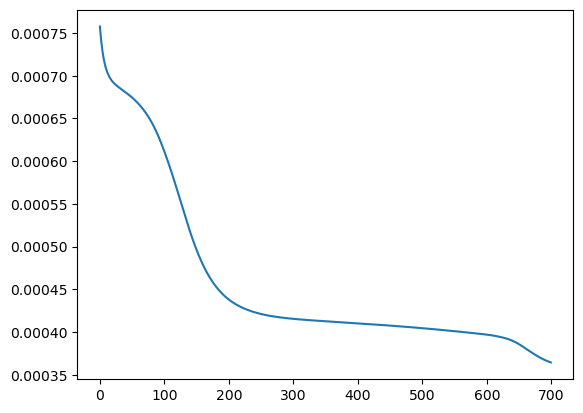

In [9]:
# Create a copy of the network
net = copy.deepcopy(net_orig)

# Loss function
loss_func = nn.NLLLoss(reduction='mean')

# dl -> Taking entire data set as a batch
data_loader = DataLoader(ds, batch_size=len(ds))

# Params
lr = 0.09
ep = 700

# Loss
#sgd(net, dl, loss_func, lrate=0.1, epochs=10, momentum=0.)
losses1 = sgd(net, data_loader, loss_func, lr, ep, 0)


plt.plot(losses1)

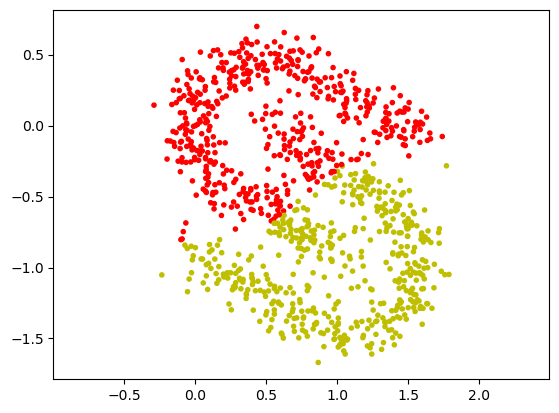

In [10]:
ds.plot(labels=net(ds.inputs()))

#  SGD with Mini-Batches and/or Momentum

## SGD with Mini-Batches (but not momentum)

In [11]:
net2 = copy.deepcopy(net_orig)
data_loader2 = DataLoader(ds, batch_size=100)
losses2 = sgd(net2, data_loader2, loss_func, lr, ep, 0)

sgd called
Epoch [1/700], Loss: 0.007294
Epoch [51/700], Loss: 0.004059
Epoch [101/700], Loss: 0.002575
Epoch [151/700], Loss: 0.000827
Epoch [201/700], Loss: 0.000565
Epoch [251/700], Loss: 0.000518
Epoch [301/700], Loss: 0.000502
Epoch [351/700], Loss: 0.000496
Epoch [401/700], Loss: 0.000493
Epoch [451/700], Loss: 0.000491
Epoch [501/700], Loss: 0.000490
Epoch [551/700], Loss: 0.000490
Epoch [601/700], Loss: 0.000490
Epoch [651/700], Loss: 0.000490


## SGD with Momentum (but not mini-batches)

In [12]:
net3 = copy.deepcopy(net_orig)
data_loader3 = DataLoader(ds, batch_size=len(ds))
losses3 = sgd(net3, data_loader3, loss_func, lr, ep, 0.9)

sgd called
Epoch [1/700], Loss: 0.000758
Epoch [51/700], Loss: 0.000416
Epoch [101/700], Loss: 0.000395
Epoch [151/700], Loss: 0.000335
Epoch [201/700], Loss: 0.000106
Epoch [251/700], Loss: 0.000047
Epoch [301/700], Loss: 0.000038
Epoch [351/700], Loss: 0.000034
Epoch [401/700], Loss: 0.000030
Epoch [451/700], Loss: 0.000027
Epoch [501/700], Loss: 0.000025
Epoch [551/700], Loss: 0.000023
Epoch [601/700], Loss: 0.000022
Epoch [651/700], Loss: 0.000020


## SGD with Momentum *and* Mini-Batches

In [13]:
net4 = copy.deepcopy(net_orig)
data_loader4 = DataLoader(ds, batch_size=100)
losses4 = sgd(net4, data_loader4, loss_func, lr, ep, 0.9)

sgd called
Epoch [1/700], Loss: 0.007178
Epoch [51/700], Loss: 0.000921
Epoch [101/700], Loss: 0.000359
Epoch [151/700], Loss: 0.000206
Epoch [201/700], Loss: 0.000170
Epoch [251/700], Loss: 0.000158
Epoch [301/700], Loss: 0.000142
Epoch [351/700], Loss: 0.000135
Epoch [401/700], Loss: 0.000150
Epoch [451/700], Loss: 0.000156
Epoch [501/700], Loss: 0.000147
Epoch [551/700], Loss: 0.000150
Epoch [601/700], Loss: 0.000145
Epoch [651/700], Loss: 0.000149


## Plot all the learning curves together

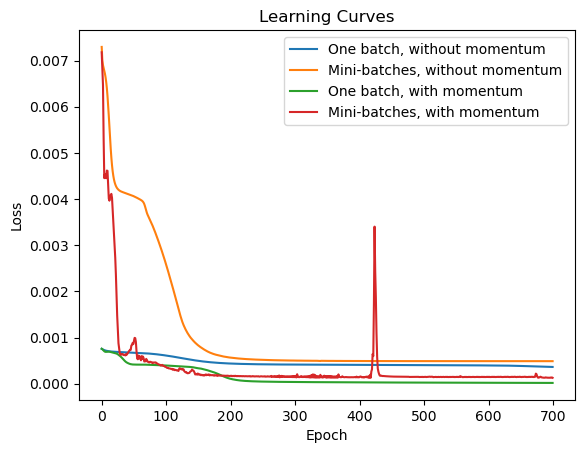

In [15]:
plt.plot(losses1, label='One batch, without momentum')
plt.plot(losses2, label='Mini-batches, without momentum')
plt.plot(losses3, label='One batch, with momentum')
plt.plot(losses4, label='Mini-batches, with momentum')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()